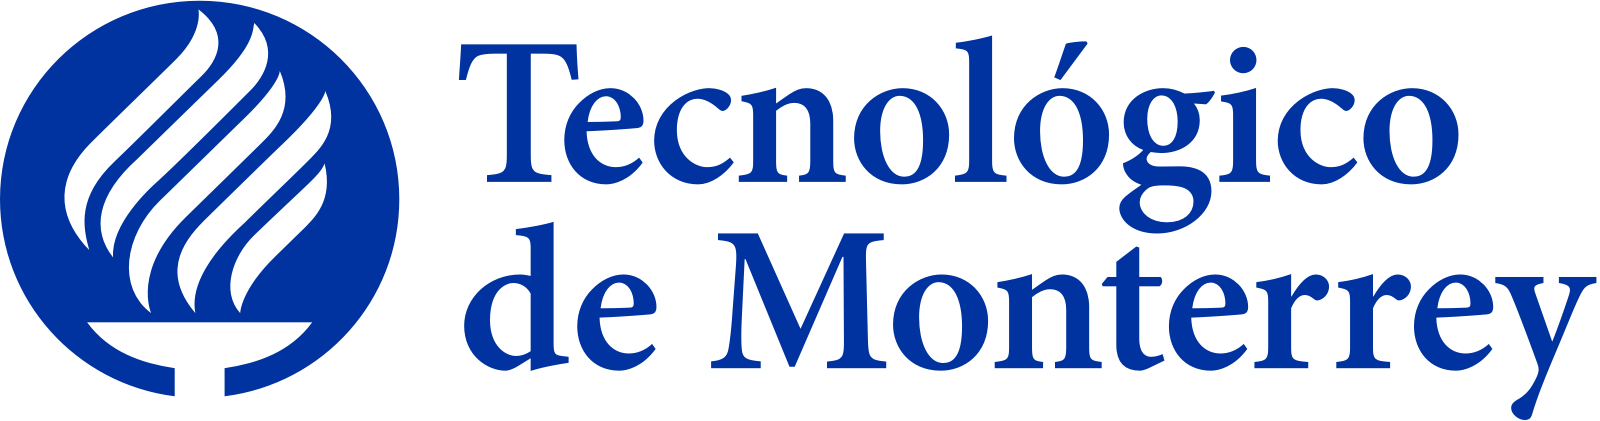

### BANDA SE CAMBIARON LAS VARIABLES EN LAS QUE TUVIMOS QUE LLENAR DATOS, EJ. DE POPULARITY SE CAMBIO A NEW_POPULARITY, etc. ESTO PARA TENERLAS SEPARADAS POR SI ACASO.
##FALTA HACER TODO LO QUE TIENE %%%%%%...%%%%%% ENCIMA DE TERMINAR FASE 2 Y EMPEZAR 3
#

##

##

##

##

##

##

##

##

##

##

##

##

#











# **Reto entregable 1**
* Guillermo Villegas Morales A01637169
* Adara Luisa Pulido Sánchez A01642450
* Jorge Eduardo Guijarro Márquez A01563113
* Alan Rojas López A01706146
* Gabriel Eduardo Meléndez Zavala A01638293





# Introducción
En este entregable realizamos una fase exploratoria de una base de datos de canciones donde cada entrada es una canción y sus atributos constan del nombre del artista/s, nombre de la canción, tonalidad, popularidad, duración entre otros. La base de datos tiene problemas como datos basura o datos faltantes, limpiearemos la base de datos para obtener un análisis propio, además de que realizamos diferentes estadísticas descriptivas.

# Objetivos
Nuestro objetivo principal es tener una base de datos limpia y completa. Adicional a esto empezamos con el análisis exploratorio. Realizamos un heatmap para detectar covarianzas dentro los atributos, un boxplot por columna para tener una mejor idea de la distribución de los datos de cada columna y un wordcloud para encontrar las palabras más frecuentes en los nombres de artistas y de canciones

# Métodos

### Import Libraries

In [105]:
import numpy as np # lots of math operations and matrices
import pandas as pd # data structures
import matplotlib.pyplot as plt # plot charts. More on this later
from scipy import stats as st
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go

df=pd.read_csv("music.csv")

In [106]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

### Información básica de la base de datos


In [107]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Buscamos los datos nulos dentro de la base de datos


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Análisis rápido de cada columna

In [109]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Dimensión de  la matríz

In [110]:
df.shape

(17996, 17)

### Imputación Simple
Se detectaron valores faltantes en las columnas de "instrumentalness", "key" y "Popularity". Utilizando media, moda y imputacion de k-vecinos más cercanos, se realizó una amputación simple de valores. Para los datos faltantes de 'popularity' introducimos el promedio de la columna ya que no cambia la distribucion. Para la columna de valores discretos 'key' introducimos el 0 donde faltaran valores ya que las columnas sin estos valores estaban en la tonalidad de C. Finalmente para la variable 'instrumentalness' imputamos con el valor anterior para que la distribucion no cambie significativamente. Adicionalmente, no se pueden borrar los datos ya que las variables incluyen un porecentaje significativo de datos, 0.0237, 0.1120, y 0.2432 respectivamente.

In [111]:
#Imprime el porcentaje de valores faltantes
print('Porcentaje de valores faltantes "Popularity": ', 1-(df['Popularity'].count()/17996))
print('Porcentaje de valores faltantes "Key": ', 1-(df['key'].count()/17996))
print('Porcentaje de valores faltantes "Instrumentalness": ', 1-(df['instrumentalness'].count()/17996))

#Creamos nuevas variables para mantener las originales
df['new_instrumentalness'] = df['instrumentalness'].ffill()
df['new_instrumentalness'].fillna(np.mean(df.instrumentalness), inplace = True) #Changes the last value

df['new_Popularity'] = df['Popularity']
df['new_Popularity'].fillna(np.mean(df.Popularity),inplace=True)

df['new_key'] = df['key'].ffill()
df['new_key'].fillna(np.mean(df.key), inplace = True) #Changes the last value
df['new_key'] = df['new_key'].astype(int)

Porcentaje de valores faltantes "Popularity":  0.023783062902867358
Porcentaje de valores faltantes "Key":  0.1119137586130251
Porcentaje de valores faltantes "Instrumentalness":  0.24322071571460324


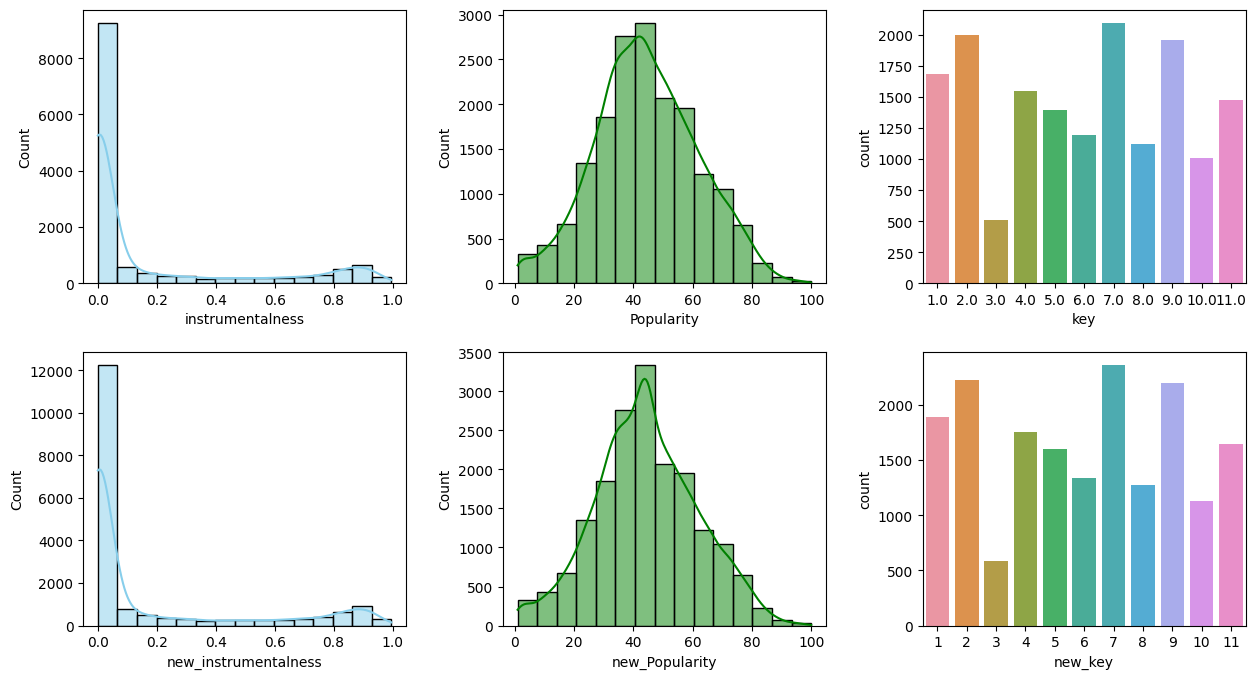

In [112]:
fig, axs = plt.subplots(2,3, figsize=(15, 8))

bin_count = int(np.ceil(np.log2(len(df)))) #sturges law to figure out appropiate bin count

sns.histplot(data=df, x="instrumentalness", kde=True, color="skyblue", ax=axs[0, 0], bins = bin_count)
sns.histplot(data=df, x="new_instrumentalness", kde=True, color="skyblue", ax=axs[1, 0], bins = bin_count)

sns.histplot(data=df, x="Popularity", kde=True, color="green", ax=axs[0, 1], bins = bin_count)
sns.histplot(data=df, x="new_Popularity", kde=True, color="green", ax=axs[1, 1], bins = bin_count)

sns.countplot(data=df, x="key", ax=axs[0, 2])
sns.countplot(data=df, x="new_key", ax=axs[1, 2])

fig.subplots_adjust(wspace=0.3, hspace=0.25)


### Clasificación de variables
* Artist name: categórica

* Track name: categórica

* Popularity: numérica

* danceability: numérica

* energy: numérica

* key: numérica

* loudness: numérica

* mode: numérica

* speechiness: numérica

* acousticness: numérica

* instrumentalness: numérica

* liveness: numérica

* valence: numérica

* tempo: numérica

* duration_in min/ms: numérica

* time_signature:numérica

* Class: categórica

In [113]:
df.info() #Show the changes that were made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Artist Name           17996 non-null  object 
 1   Track Name            17996 non-null  object 
 2   Popularity            17568 non-null  float64
 3   danceability          17996 non-null  float64
 4   energy                17996 non-null  float64
 5   key                   15982 non-null  float64
 6   loudness              17996 non-null  float64
 7   mode                  17996 non-null  int64  
 8   speechiness           17996 non-null  float64
 9   acousticness          17996 non-null  float64
 10  instrumentalness      13619 non-null  float64
 11  liveness              17996 non-null  float64
 12  valence               17996 non-null  float64
 13  tempo                 17996 non-null  float64
 14  duration_in min/ms    17996 non-null  float64
 15  time_signature     

Como podemos ver, todas las columnas tienen 17996 datos no nulos

### Creando nueva clase de Género
Al estar codificada la variable "Class" en números del 1 al 10 es necesario interpretar los números con respecto a cada uno de los géneros musicales. En Base a la tabla proporcionada se crea una nueva variable llamada "Genre" que representa explicítamente el género al que pertenece cada canción.

In [114]:
#Create a function that relates the numerical values of class to its corresponding genre
def class_to_genre(row):
    if row == 0:
        return 'Acoustic/Folk'
    elif row == 1:
        return 'Alternative'
    elif row == 2:
       return 'Blues'
    elif row == 3:
       return 'Bollywood'
    elif row == 4:
       return 'Country'
    elif row == 5:
        return 'Hip-Hop'
    elif row == 6:
       return 'Indie'
    elif row == 7:
        return 'Instrumental'
    elif row == 8:
        return 'Metal'
    elif row == 9:
        return 'Pop'
    elif row == 10:
        return 'Rock'

df['Genre'] = df['Class'].apply(class_to_genre)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_in min/ms,time_signature,Class,new_instrumentalness,new_Popularity,new_key,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,...,0.0849,0.8990,134.071,234596.0,4,5,0.177562,60.0,1,Hip-Hop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,...,0.1010,0.5690,116.454,251733.0,4,10,0.004010,54.0,3,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,...,0.3940,0.7870,147.681,109667.0,4,6,0.000196,35.0,6,Indie
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,...,0.1220,0.5690,107.033,173968.0,4,5,0.000196,66.0,10,Hip-Hop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,...,0.1720,0.0918,199.060,229960.0,4,10,0.016100,53.0,2,Rock


### New class Key
Similar al proceso anterior, decodificamos el atributo 'key' de los registros donde el 0.0 recibe el la calsificación de C, 1.0 de C#, ... y 11.0 de B. dentro de una nueva variable categórica 'Key'.

In [115]:
def class_to_Key(row):
    if row == 0.0:
        return 'C'
    elif row == 1.0:
        return 'C#'
    elif row == 2.0:
       return 'D'
    elif row == 3.0:
       return 'D#'
    elif row == 4.0:
       return 'E'
    elif row == 5.0:
        return 'F'
    elif row == 6.0:
       return 'F#'
    elif row == 7.0:
        return 'G'
    elif row == 8.0:
        return 'G#'
    elif row == 9.0:
        return 'A'
    elif row == 10.0:
        return 'A#'
    elif row == 11.0:
        return 'B'

df['Key'] = df['key'].apply(class_to_Key)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_in min/ms,time_signature,Class,new_instrumentalness,new_Popularity,new_key,Genre,Key
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,...,0.8990,134.071,234596.0,4,5,0.177562,60.0,1,Hip-Hop,C#
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,...,0.5690,116.454,251733.0,4,10,0.004010,54.0,3,Rock,D#
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,...,0.7870,147.681,109667.0,4,6,0.000196,35.0,6,Indie,F#
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,...,0.5690,107.033,173968.0,4,5,0.000196,66.0,10,Hip-Hop,A#
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,...,0.0918,199.060,229960.0,4,10,0.016100,53.0,2,Rock,D


### Histogramas


<Axes: xlabel='duration_in min/ms', ylabel='Count'>

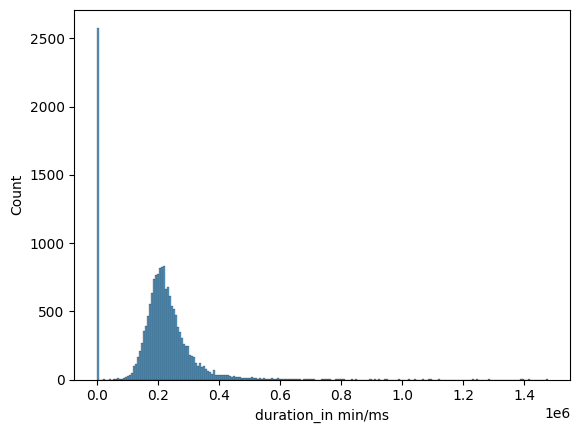

In [116]:
sns.histplot(data=df,x="duration_in min/ms")

Text(0.5, 1.0, 'Duracion de las canciones')

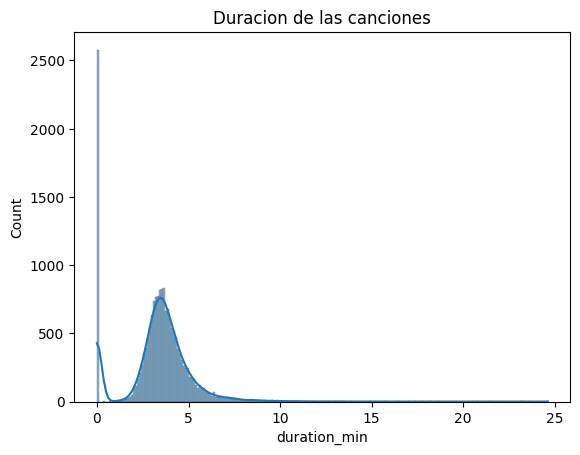

In [117]:
df['duration_min'] = df['duration_in min/ms']/60000
sns.histplot(data=df,x="duration_min", kde = True).set_title('Duracion de las canciones')

Con el fin de observar la distribución de frecuencias del tiempo en cada una de las canciones se genera un histograma de la variable "duration in min/ms". Sin embargo, al revisar la gráfica  se observa una gran cantidad de datos en la duración 3 min, al corroborar con la base de datos se encontró que algunas canciones estaban en minutos mientras que otras estaban escritas como milisegundos. Por lo tanto se comprueba la medida de la duración en cada una de las canciones, aquellas con valores menores a 100 se multiplican por 60000 para convertirlos a minutos. Una vez se tiene todos los datos de la duración en minutos se vuelve a generar un histograma de la misma variable con los datos correctamente medidos.

In [118]:
df['duration_min'].describe()

count    17996.000000
mean         3.345741
std          1.866485
min          0.000008
25%          2.772283
50%          3.486000
75%          4.208167
max         24.619783
Name: duration_min, dtype: float64

Se observa que al generar esta nueva columna de datos que describe la duracion en minutos de las canciones resalta que la maxima de los datos es de 29.86 mientras la media es de 3.93 con una std de 1.43.
Por lo tanto seria importante hacer un analisis para determinar si todos los datos son relevantes para el analisis ya que existen valores extraordinarios

### Nueva variable "collab"
Aquí creamos una nueva variable booleana 'collab' donde 1 significa que la canción es una colaboración entre artistas y 0 es que no lo es. Para hacer esto definimos que hay dos posible casos que indiquen esto: cuando la canción tiene una ',' en el atributo 'Artist Name' o cuando contiene la palabra 'feat.' dentro de 'Track Name'. En total encontramos 1202 canciones con colaboración.


In [119]:
df['collab'] = df['Artist Name'].str.contains(',') + df['Track Name'].str.contains('feat.')
df['collab']

0         True
1        False
2        False
3         True
4        False
         ...  
17991    False
17992    False
17993    False
17994    False
17995    False
Name: collab, Length: 17996, dtype: bool

# **Fase 2. Exploración de los datos**


In [120]:
df2=df[['new_Popularity','danceability','energy','loudness','speechiness','acousticness','new_instrumentalness','liveness','valence','tempo','duration_min']]
df2.head()

,new_Popularity,danceability,energy,loudness,speechiness,acousticness,new_instrumentalness,liveness,valence,tempo,duration_min
0,60.0,0.854,0.564,-4.964,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,3.909933
1,54.0,0.382,0.814,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.195550
2,35.0,0.434,0.614,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,1.827783
3,66.0,0.853,0.597,-6.528,0.0555,0.021200,0.000196,0.1220,0.5690,107.033,2.899467
4,53.0,0.167,0.975,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,3.832667


Estos seran las variables cuantitativas que se usaran para el analisis de estadistica descriptiva

### Correlation Heatmap
En cuanto a la visualización de la matriz de correlación que tienen entre las variables de "Popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo" y "duration_in min", y se produce un mapa de calor con el fin de encontrar alguna relación entre "Popularity" y las demas variables.


<Axes: >

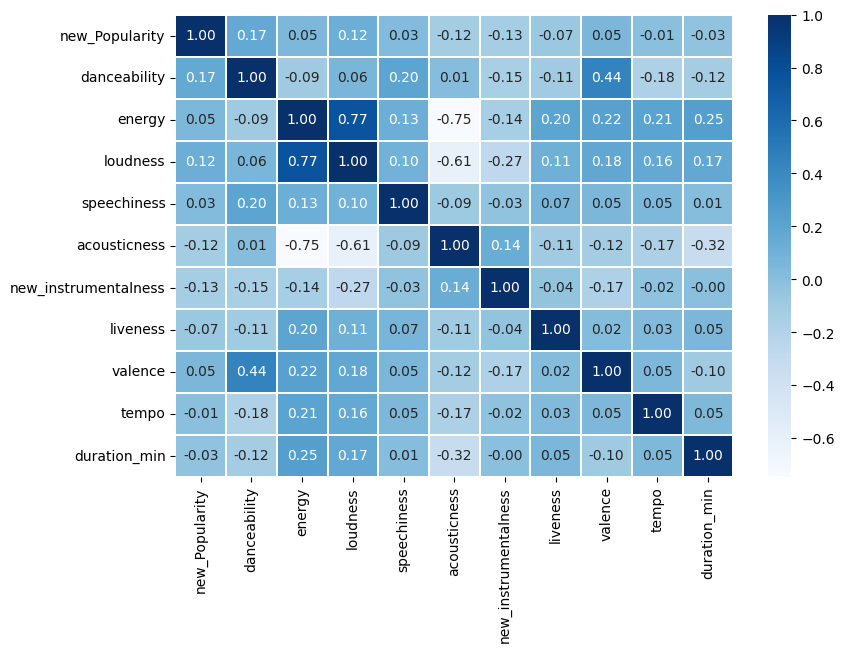

In [121]:
fig, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(data = df2.corr(), cmap ='Blues', linewidths = 0.30, annot =True,fmt='.2f')

Se denotan la variables "loudness" y "energy" con una relacion positiva moderadamente fuerte de 0.77 que nos indica entre más ruidosa la canción la energia de ella suele aumentar también. Seguida por "valence" y "danceability" con una relacion moderademente debil de 0.44. Por otro lado, "acousticness" y "energy" tienen una relación negativa moderadamente fuerte lo que sugiere que entre más acustica menos energia en la canción.
Además, la variable "Popularity" tiene relaciónes muy poco significativas o neutras con las demas variables cuantitativas.

### Boxplot
Con el objetivo de ver la relación que tienen el género de las canciones con su popularidad se genera un boxplot. En el eje horizontal de la visualización se representa la popularidad de las canciones, mientras que en el eje vertical se observan cada una de las categorías de género.

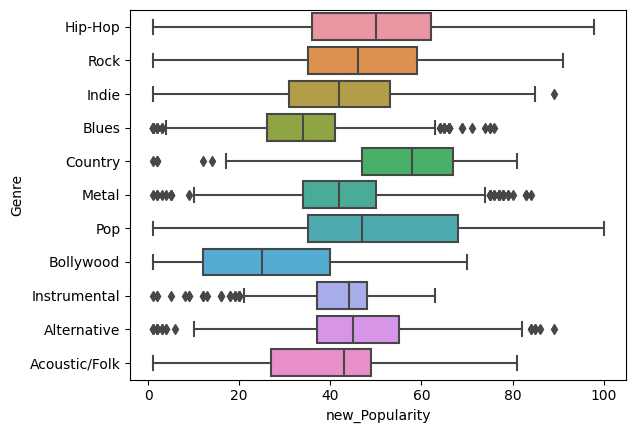

In [122]:
sns.boxplot(x=df['new_Popularity'],y=df['Genre']) #Distribución de popularidad por Género musical
plt.show()

Esta gráfica presenta información acerca del rango intercuartil, la mediana, la cual indica la variabilidad en la popularidad dentro de cada género, así como los valores atípicos. Al examinar los datos proporcionados por el boxplot se resalta que el género "Country" tiende a ser más popular, pues presenta una mediana más alta que el resto, mientras que "Indie" y "Alternative" tienen canciones excepcionalmente populares. Por otro lado, el género con menor popularidad es el de "Bollywood" con una mediana menor.

### Worldcloud de artistas
Generamos un Wordcloud de artistas para visualizar las palabras más recurridas.

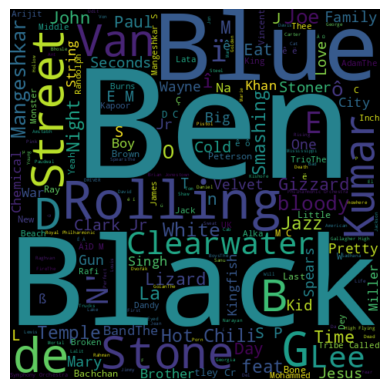

In [123]:
# Create the wordcloud object
artist_array = ''.join(df['Artist Name'])
wordcloud = WordCloud(width=480, height=480, margin=0).generate(artist_array)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
#sns.violinplot(x=df["species"], y=df["sepal_length"])

Palabras más comunes en los nombres de artistas, resalta "Ben", "Blue", "Black", "Rolling", entre otros.

### Worldcloud de nombres de canciones
De misma manera se genero un wordcloud para los nombres de canciones y buscamos por patrones o relaciones.

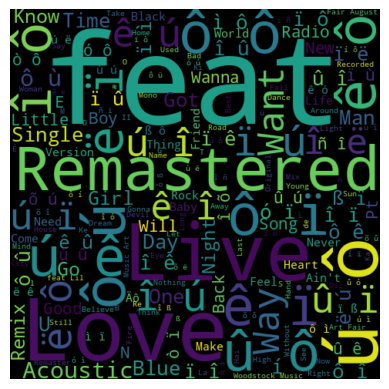

In [124]:
# Create the wordcloud object
track_array = ''.join(df['Track Name'])
wordcloud = WordCloud(width=480, height=480, margin=0).generate(track_array)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Palabras más comunes en nombres de canciones, resaltan feat, Love ,remastered y live. A su vez, ecnontramos caracteres inusuales que corresponden en buena parte a los datos basura dentro de la columna

### Comparativo entre "Popularity"y "Genre"
Se realizaron histogramas de la popularidad de cada genero con fin de visualizar la popularidad de cada genero de musica.

Text(0.5, 0.98, 'Popularity count per Genre')

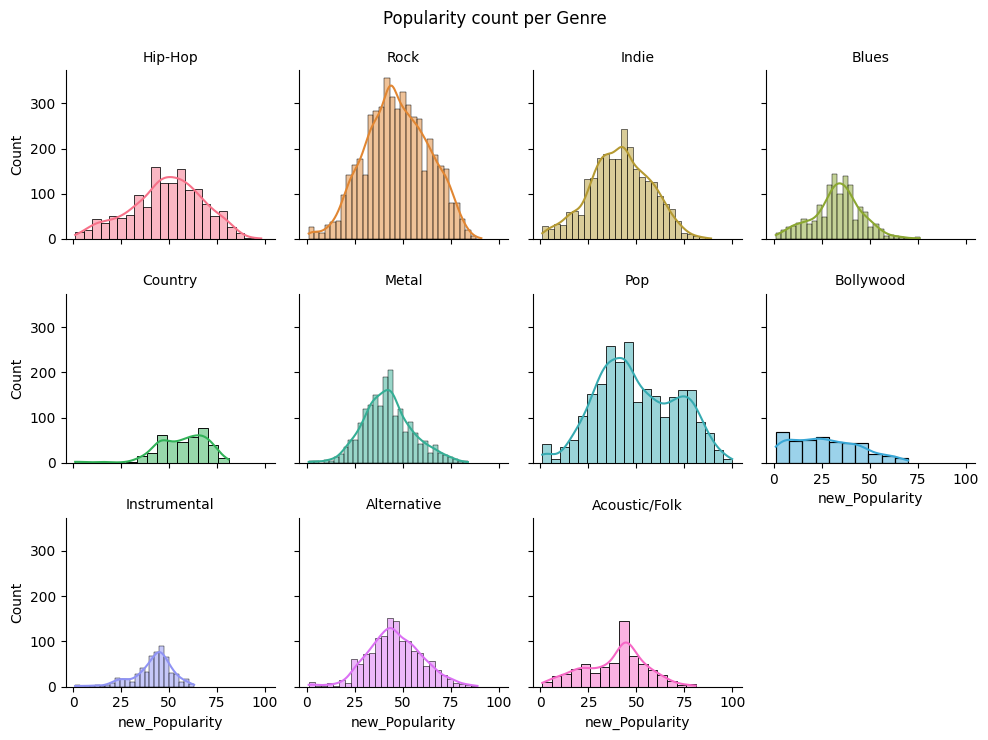

In [125]:
g = sns.FacetGrid(df, col='Genre',hue = 'Genre', col_wrap=4, height=2.5)
g.map(sns.histplot,'new_Popularity', kde = True)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Popularity count per Genre')

#fig, axs = plt.subplots(4, 3, figsize=(7, 7))
#axs = sns.FacetGrid(data = df, col = 'Genre',hue = 'Genre')
#axs.map(sns.histplot, 'Popularity', kde = True)

%%%%%%%%%%%%%%%%%%%%%% CONTAR QUE SE OBSERVA AQUI %%%%%%%%%%%%%%%%%%%%%%

### Estadistica basica de las variables relevantes
%%%%%%%%%%%%%%%%%%%%% EXPLICA QUE SE HACE AQUI %%%%%%%%%%%%%%%%%%%%%5

In [126]:
#Pairplot with the most relevant or significant variables
df3=df[['new_Popularity','danceability','energy','loudness','liveness','duration_min']]
g = sns.pairplot(df3, kind="reg", diag_kind = 'kde',height=2,corner = True, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#makes the lower half have a sort of heat map density
g.map_lower(sns.kdeplot, color=".2",levels=5)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7c025f9e9000> (for post_execute):


KeyboardInterrupt: ignored

%%%%%%%%%% OBSERVACIONES GENERALES (SON MUCHOS ENTONCES LOS QUE MAS RESALTAN) %%%%%%%%%%%%%%%%

### Bar Plot de "Genre"
Visualizamos cuales son los generos de musica más frecuentes dentro de los datos

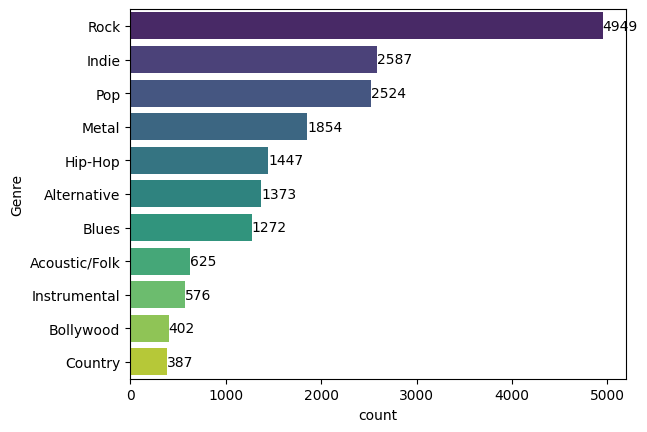

In [127]:
ax = sns.countplot(y = 'Genre', data = df, palette = 'viridis', order = df['Genre'].value_counts().index)
for bars in ax.containers:
  ax.bar_label(bars,size= 10)

Y sus respectivos porcentajes:

In [128]:
df['Genre'].value_counts(normalize=True)

Rock             0.275006
Indie            0.143754
Pop              0.140253
Metal            0.103023
Hip-Hop          0.080407
Alternative      0.076295
Blues            0.070682
Acoustic/Folk    0.034730
Instrumental     0.032007
Bollywood        0.022338
Country          0.021505
Name: Genre, dtype: float64

Se observa que el genero "Rock" es el genero prevalente acumulando 4949 canciones o 27% del total seguido por "Indie", "Pop", "Metal",etc.

In [129]:
#Estadística Básica
columnas_numericas = df2.select_dtypes(include=[int, float])

#Coeficiente de asimetria
coeficiente_asimetria_dict = {}

for i in columnas_numericas.columns:
    coeficiente = columnas_numericas[i].skew()
    coeficiente_asimetria_dict[i] = coeficiente

print(f"coeficiente de asimetría: {coeficiente_asimetria_dict}")

#Coeficiente de variación (%)
coeficiente_variacion_dict = {}

for i in columnas_numericas.columns:
    media = columnas_numericas[i].mean()
    desviacion_estandar = columnas_numericas[i].std()
    coeficiente_variacion = (desviacion_estandar / media) * 100
    coeficiente_variacion_dict[i] = coeficiente_variacion

print(f"coeficiente de variación: {coeficiente_variacion_dict}")

coeficiente de asimetría: {'new_Popularity': 0.07662169457966905, 'danceability': -0.08352192347287282, 'energy': -0.6611691117532402, 'loudness': -1.7613834605630743, 'speechiness': 3.088002356652607, 'acousticness': 1.1054970459533517, 'new_instrumentalness': 1.5257937663230359, 'liveness': 2.176072140966749, 'valence': 0.08992812736275954, 'tempo': 0.37961889582629255, 'duration_min': 0.8469299769444526}
coeficiente de variación: {'new_Popularity': 38.68257565171272, 'danceability': 30.595935969574263, 'energy': 35.51322160007704, 'loudness': -51.186008881905785, 'speechiness': 104.85411233918515, 'acousticness': 125.72046929178262, 'new_instrumentalness': 171.13801210900118, 'liveness': 81.16008924316768, 'valence': 49.401699003315144, 'tempo': 24.115750260034265, 'duration_min': 55.786908277066985}


%%%%%%%%%%%%%%% FALTA INTERPRETAR & FALTAN ESTADISTICAS %%%%%%%%%%%%%%%%%%%%%%%%%

*******COMO SON MUCHAS ESTADISTICAS PENSE EN PONER LAS NUMERICAS EN UNA TABLA, ESTILO .*describe*

 (EN LUGAR DE UN PRINT, PARA QUE SE VEA MÁS BONITO)*********

(media, cuartiles, moda, varianza, desviación estándar, rango, rango intercuartil, coeficiente de asimetría, curtosis, coeficiente de variación) para las diferentes variables dependiendo de su tipo y las consideraciones particulares que cualquier estadística pueda tener. Interpreta estos resultados.

###Transformación de Box-Cox


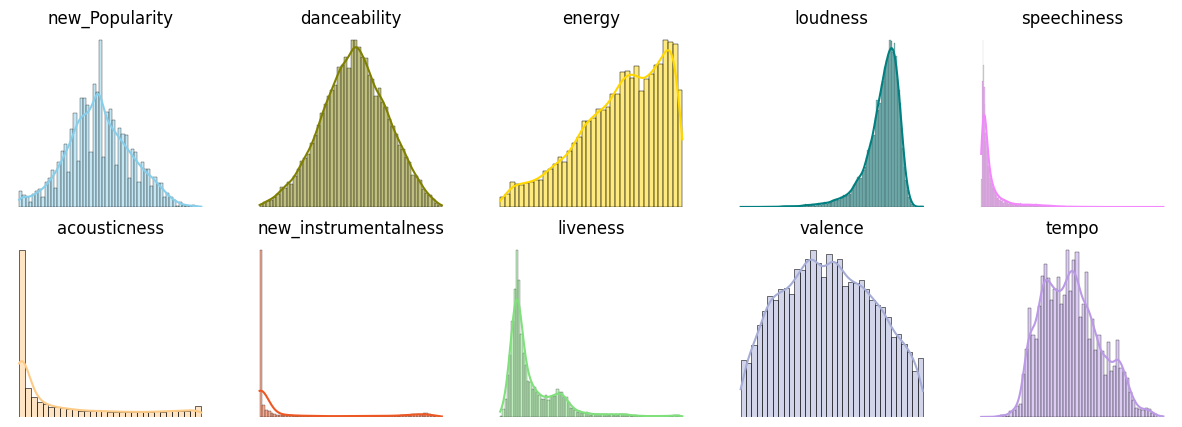

In [130]:
fig, axs = plt.subplots(2,5, figsize=(15, 5))

sns.histplot(data=df2, x="new_Popularity", kde=True, color="skyblue", ax=axs[0, 0]).set_title('new_Popularity')
sns.histplot(data=df2, x="danceability", kde=True, color="olive", ax=axs[0, 1]).set_title('danceability')
sns.histplot(data=df2, x="energy", kde=True, color="gold", ax=axs[0, 2]).set_title('energy')
sns.histplot(data=df2, x="loudness", kde=True, color="teal", ax=axs[0, 3]).set_title('loudness')
sns.histplot(data=df2, x="speechiness", kde=True, color="#F387FE", ax=axs[0, 4]).set_title('speechiness')
sns.histplot(data=df2, x="acousticness", kde=True, color="#FECB87", ax=axs[1, 0]).set_title('acousticness')
sns.histplot(data=df2, x="new_instrumentalness", kde=True, color="#EE5824", ax=axs[1, 1]).set_title('new_instrumentalness')
sns.histplot(data=df2, x="liveness", kde=True, color="#7FE07C", ax=axs[1, 2]).set_title('liveness')
sns.histplot(data=df2, x="valence", kde=True, color="#A6ADD6", ax=axs[1, 3]).set_title('valence')
sns.histplot(data=df2, x="tempo", kde=True, color="#BB99E7", ax=axs[1, 4]).set_title('tempo')

for ax in axs.flat:
    ax.label_outer()

axs = axs.flatten()
for ax in axs:
    ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])

plt.xticks(visible=False)

plt.show()


%%%%%%%%%%%%%%%%%%FALTA RESPONDER TODAS LAS PREGUNTAS DE LA PARTE DE BOX COX%%%%%%%%%%%%%%%%%%

In [131]:
data_popularity, lambda_popularity = st.boxcox(df['new_Popularity'])

### test de Grubbs


%%%%%%%SOLO LAS QUE ASEMEJAN A UNA DISTRIBUCION NORMAL%%%%%%%%

In [132]:
df2.describe()

,new_Popularity,danceability,energy,loudness,speechiness,acousticness,new_instrumentalness,liveness,valence,tempo,duration_min
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,-7.910660,0.079707,0.247082,0.177977,0.196170,0.486208,122.623294,3.345741
std,17.218436,0.166268,0.235373,4.049151,0.083576,0.310632,0.304586,0.159212,0.240195,29.571527,1.866485
min,1.000000,0.059600,0.000020,-39.952000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,0.000008
25%,33.000000,0.432000,0.509000,-9.538000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,2.772283
50%,44.000000,0.545000,0.700000,-7.016000,0.047400,0.081400,0.003870,0.129000,0.481000,120.065500,3.486000
75%,56.000000,0.659000,0.860000,-5.189000,0.083000,0.434000,0.199000,0.258000,0.672000,141.969250,4.208167
max,100.000000,0.989000,1.000000,1.355000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,24.619783


 Radar Chart of Top 10 popular songs

In [133]:
# parameters we will be using
top10 = pd.DataFrame(df.nlargest(10,'new_Popularity'))

top_10_song_names = [] # Create array for song names in Radar Chart
for name in (pd.merge(top10,df)['Track Name']):
  top_10_song_names.append(name)

Radar_Chart1 = go.Figure() #Creating Chart1
for i in range(0,10):
  Radar_Chart1.add_trace(go.Scatterpolar(
        r= top10.iloc[i,2:],
        theta=columnas_numericas.columns,
        fill='toself',
        name = top_10_song_names[i]
  ))
Radar_Chart1.show()

Radar_Chart2 = go.Figure() #Creating Chart2
for i in range(0,10):
  Radar_Chart2.add_trace(go.Scatterpolar(
        r= top10.iloc[i,[3,12]],
        theta=columnas_numericas.columns,
        fill='toself',
        name = top_10_song_names[i]
  ))
Radar_Chart2.show()